# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime
import numpy as np
import pytz 

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [6]:
#Add format specifier to request url
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"
requests.get(btc_url), requests.get(eth_url)

(<Response [200]>, <Response [200]>)

In [7]:
#Execute GET request and store response
response_data_btc = requests.get(btc_url)
response_data_eth = requests.get(eth_url)

In [8]:
#Get content for 'btc' and 'eth'
response_content_btc = response_data_btc.content
response_content_eth = response_data_eth.content
print(response_content_btc)
print(response_content_eth)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18510925,\n\t\t\t"total_supply": 18510925,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 10642.8900000000000000,\n\t\t\t\t\t"volume_24h": 17354650129,\n\t\t\t\t\t"market_cap": 197099559579,\n\t\t\t\t\t"percentage_change_1h": -0.0339779350621173,\n\t\t\t\t\t"percentage_change_24h": 0.3842909669775580,\n\t\t\t\t\t"percentage_change_7d": -1.1882771820759100,\n\t\t\t\t\t"percent_change_1h": -0.0339779350621173,\n\t\t\t\t\t"percent_change_24h": 0.3842909669775580,\n\t\t\t\t\t"percent_change_7d": -1.1882771820759100\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1602125926\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1602125926,\n\t\t"num_cryptocurrencies": 1438,\n\t\t"error": null\n\t}\n}'
b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"sy

In [9]:
#Use json function to format
data_btc = response_data_btc.json()
data_eth = response_data_eth.json()
data_btc, data_eth
#print( .dumps(data_btc, indent=4))
#print( .dumps(data_eth, indent=4))

({'data': {'1': {'id': 1,
    'name': 'Bitcoin',
    'symbol': 'BTC',
    'website_slug': 'bitcoin',
    'rank': 1,
    'circulating_supply': 18510925,
    'total_supply': 18510925,
    'max_supply': 21000000,
    'quotes': {'USD': {'price': 10642.89,
      'volume_24h': 17354650129,
      'market_cap': 197099559579,
      'percentage_change_1h': -0.0339779350621173,
      'percentage_change_24h': 0.384290966977558,
      'percentage_change_7d': -1.18827718207591,
      'percent_change_1h': -0.0339779350621173,
      'percent_change_24h': 0.384290966977558,
      'percent_change_7d': -1.18827718207591}},
    'last_updated': 1602125926}},
  'metadata': {'timestamp': 1602125926,
   'num_cryptocurrencies': 1438,
   'error': None}},
 {'data': {'1027': {'id': 1027,
    'name': 'Ethereum',
    'symbol': 'ETH',
    'website_slug': 'ethereum',
    'rank': 2,
    'circulating_supply': 112915695,
    'total_supply': 112915695,
    'max_supply': 0,
    'quotes': {'USD': {'price': 339.27,
      'v

In [10]:
# Fetch current BTC price

btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = my_btc *btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")



The current value of your 1.2 BTC is $12771.47
The current value of your 5.3 ETH is $1798.13


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_agg = 200
my_spy = 50
shares_data = {"shares": [200,50]}

# Set the tickers
tickers = ["AGG", "SPY"]

#Create DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)
#Display shares
df_shares

,shares
AGG,200
SPY,50


In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key) 

alpaca_api_key, alpaca_secret_key

('PKV67VZV9NXFISZP7N65', '3N7LoiAPwx2PH2yKjIEz2Bikp24cYpvZdxoO8CV8')

In [13]:
# Format current date as ISO format
current_date = datetime.today().strftime('%Y-%m-%d')
start_date = pd.Timestamp(current_date, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
agg_close_price = pd.DataFrame()
spy_close_price = pd.DataFrame()
df = api.get_barset(tickers, timeframe,start = current_date,end=start_date).df


# Pick AGG and SPY close prices
agg_close_price = (df["AGG"]["close"]).astype(float)
spy_close_price = (df["SPY"]["close"]).astype(float)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price[0]}")

print(f"Current SPY closing price: ${spy_close_price[0]}")

Current AGG closing price: $116.84
Current SPY closing price: $294.995


In [14]:
# Compute the current value of shares
agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value[0]}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value[0]}")

The current value of your 50 SPY shares is $14749.75
The current value of your 200 AGG shares is $23368.0


In [17]:
my_btc_value, my_eth_value

(12771.467999999999, 1798.1309999999999)

### Savings Health Analysis

In [20]:
monthly_income = 12000
#group bitcoin & Etherian assets
crypto_value = (my_btc_value + my_eth_value)

#Calculate total $ amount of Shares 
shares_value = (agg_value[0] + spy_value[0])

savings = [my_btc_value + my_eth_value] 


#Create savings DataFrame
savings_value = [
    #shares_value + crypto_value,
    shares_value,
    crypto_value
]

df_savings = pd.DataFrame(savings_value, index=["Crypto","Shares"], columns=["Amount"])


# Display savings DataFrame
crypto_amt = df_savings.loc['Crypto']['Amount']
shares_amt = df_savings.loc['Shares']['Amount']

df_savings



,Amount
Crypto,38117.750
Shares,14569.599


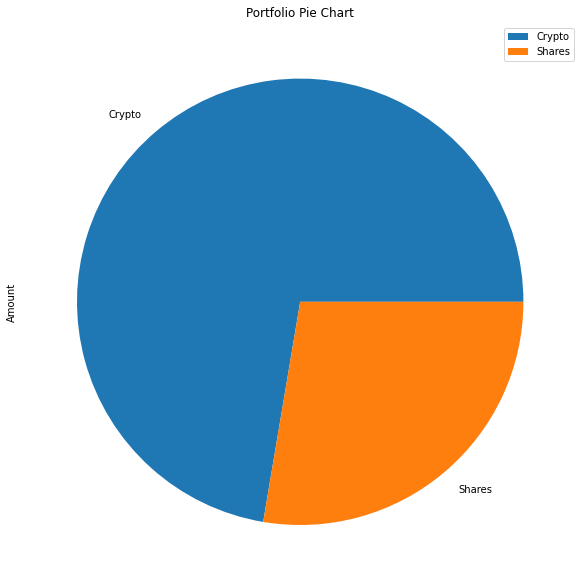

In [21]:
#Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Portfolio Pie Chart", figsize =(10,20))


In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = (crypto_value + shares_value)
surplus_shortage = round(total_savings - emergency_fund,2)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations you have enoung money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulation on reaching your financial goal!")
else:
    print(f"You are {surplus_shortage} away from reaching your goal")

Congratulations you have enoung money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
end_date = pd.Timestamp.now(tz="America/New_York")
start_date = (end_date - pd.DateOffset(years=5)).isoformat()
# Set the ticker information
tickers = ["SPY","AGG"]

df_ticker = api.get_barset(tickers,timeframe,start=start_date,end=end_date).df

# Display sample data
df_ticker.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
2015-10-07 00:00:00-04:00  109.55  109.680  109.4800  109.57  1810484  198.90   
2015-10-08 00:00:00-04:00  109.70  109.700  109.3037  109.40  1861458  198.95   
2015-10-09 00:00:00-04:00  109.32  109.465  109.2423  109.32  2717365  201.37   
2015-10-12 00:00:00-04:00  109.48  109.650  109.3300  109.63   816909  201.42   
2015-10-13 00:00:00-04:00  109.62  109.750  109.4900  109.63  1360561  200.65   

                                                               
                              high     low   close     volume  
2015-10-07 00:00:00-04:00  199.825  197.48  199.45  106298455  
2015-10-08 00:00:00-04:00  201.550  198.59  201.22  126370035  
2015-10-09 00:00:00-04:00  201.900  200.58  201.36   74424197  
2015-10-12 00:00:00-04:00  201.760  200.91  201.55   42032769  
2015-10-13 00:00:00-04:00  202.160  200.05  200.22   72076783

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(portfolio_data = df_ticker, weights = [.60,.40],num_simulation = 500, num_trading_days = 252*30)



In [26]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
2015-10-07 00:00:00-04:00  109.55  109.680  109.4800  109.57  1810484   
2015-10-08 00:00:00-04:00  109.70  109.700  109.3037  109.40  1861458   
2015-10-09 00:00:00-04:00  109.32  109.465  109.2423  109.32  2717365   
2015-10-12 00:00:00-04:00  109.48  109.650  109.3300  109.63   816909   
2015-10-13 00:00:00-04:00  109.62  109.750  109.4900  109.63  1360561   

                                           SPY                           \
                          daily_return    open     high     low   close   
2015-10-07 00:00:00-04:00          NaN  198.90  199.825  197.48  199.45   
2015-10-08 00:00:00-04:00    -0.001552  198.95  201.550  198.59  201.22   
2015-10-09 00:00:00-04:00    -0.000731  201.37  201.900  200.58  201.36   
2015-10-12 00:00:00-04:00     0.002836  201.42  201.760  200.91  201.55   
2015-10-13 00:00:00-04:00     0.000000  200.65  202.160  200.05  200.22   

                                                   
                              volume daily_return  
2015-10-07 00:00:00-04:00  106298455          NaN  
2015-10-08 00:00:00-04:00  126370035     0.008874  
2015-10-09 00:00:00-04:00   74424197     0.000696  
2015-10-12 00:00:00-04:00   42032769     0.000944  
2015-10-13 00:00:00-04:00   72076783    -0.006599

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001554,0.995438,0.997440,0.995736,0.993893,0.999649,1.003116,0.995499,1.000990,0.999912,...,1.001622,0.999691,0.987733,0.997647,1.000269,0.997354,0.997958,1.005221,0.992927,1.005953
2,1.002248,1.000209,0.999366,0.989570,0.985324,0.997997,0.999376,0.998841,1.001774,0.998276,...,1.003881,0.995342,0.997049,1.000607,1.000973,1.004162,0.993612,1.001341,0.999186,1.002758
3,0.995930,1.004642,0.994761,0.994378,0.985228,0.993844,0.999793,1.002290,1.003765,0.999650,...,1.000287,0.986618,0.996141,1.000514,0.988707,1.007571,1.001581,0.996594,0.995733,1.008840
4,0.991354,1.007600,0.999972,1.004540,0.984625,0.989797,0.999547,0.998972,1.000786,1.002138,...,0.995889,0.990273,0.990206,0.994664,0.986512,1.005869,1.009026,0.990719,1.008998,1.016586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.831384,4.361075,4.987437,9.215486,3.957755,5.798848,5.682430,4.392568,13.036555,11.878752,...,6.589098,5.655673,2.010965,7.590654,11.441167,5.693173,4.169294,4.619390,5.098637,4.273469
7557,9.827469,4.327113,5.007668,9.209036,3.976184,5.837580,5.701265,4.396042,13.113855,11.811902,...,6.604489,5.682479,2.013068,7.609172,11.419753,5.671706,4.158883,4.604616,5.145296,4.267720
7558,9.807398,4.339040,5.041498,9.259107,3.992552,5.843396,5.728395,4.362524,13.159118,11.764139,...,6.598826,5.658625,2.011692,7.608038,11.366095,5.667394,4.130959,4.588052,5.152480,4.225466
7559,9.777957,4.307524,5.017648,9.306761,3.918872,5.821654,5.726694,4.388855,13.147738,11.745535,...,6.547652,5.661467,2.003761,7.564465,11.410694,5.646379,4.106704,4.607021,5.199563,4.213897


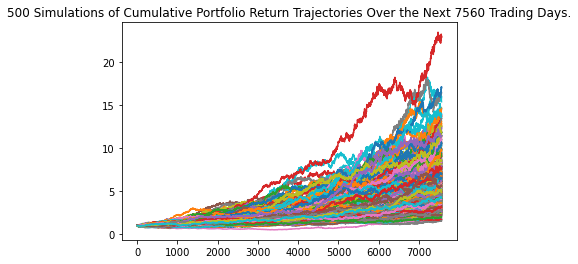

In [28]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

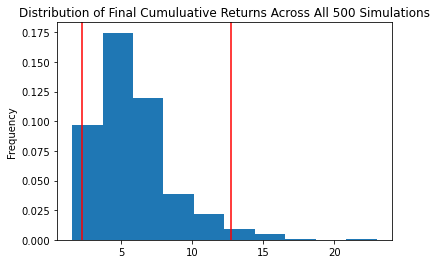

In [29]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.853694
std               2.772789
min               1.565322
25%               3.992614
50%               5.324671
75%               7.060808
max              22.980696
95% CI Lower      2.288664
95% CI Upper     12.732237
Name: 7560, dtype: float64


### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [31]:
# Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45773.28 and $254644.75


### How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68659.92 and $381967.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(portfolio_data = df_ticker,weights = [.20,.80],num_simulation = 500, num_trading_days = 252*5)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987690,0.987043,0.993298,0.978640,1.012928,0.987626,0.994942,0.986274,0.993395,0.995078,...,1.003094,1.008166,0.999353,1.015479,1.011629,1.009316,1.008472,0.994526,0.990389,1.018062
2,0.984245,0.981715,0.976706,0.982299,1.004170,0.990414,0.998420,0.987402,0.979205,0.998888,...,1.022389,1.025380,1.008439,1.028530,1.002464,1.012457,0.992109,0.993428,0.989569,1.001843
3,0.982036,0.980900,0.961130,0.990450,1.015453,0.998168,1.004021,0.970390,0.981733,0.996581,...,1.029324,1.030702,1.017775,1.033092,0.996769,1.020787,0.997967,0.989610,0.991461,1.010811
4,0.987763,0.974286,0.954940,0.995524,1.011672,0.993106,1.004361,0.975169,0.978971,0.990019,...,1.023647,1.024781,1.022135,1.040362,0.991340,1.024681,1.002559,0.980626,0.994199,1.007518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.862518,0.863302,2.295300,2.355282,1.408868,1.269954,0.823651,1.408030,1.481181,1.570346,...,2.175682,3.255063,1.963229,2.366410,1.332559,0.879411,1.791273,1.903632,0.777710,1.304803
1257,1.877777,0.868443,2.331190,2.347291,1.378236,1.267092,0.808182,1.422638,1.476563,1.559791,...,2.180524,3.273576,1.956385,2.390637,1.327944,0.875231,1.780500,1.897238,0.784908,1.309433
1258,1.860896,0.860923,2.337062,2.355200,1.401156,1.264429,0.806130,1.446448,1.495581,1.581068,...,2.199615,3.271238,1.985353,2.417644,1.353973,0.874203,1.796333,1.889958,0.784201,1.312766
1259,1.879964,0.857486,2.341248,2.332976,1.389937,1.266850,0.789670,1.458900,1.492509,1.590576,...,2.191154,3.237669,1.990370,2.391898,1.366563,0.874421,1.774174,1.891509,0.782735,1.313380


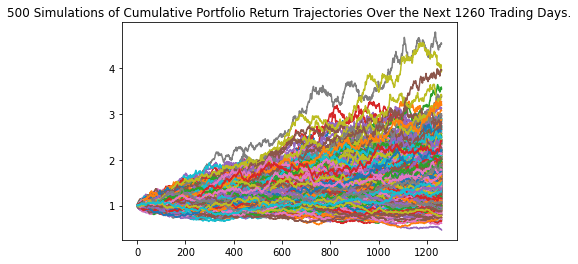

In [35]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()

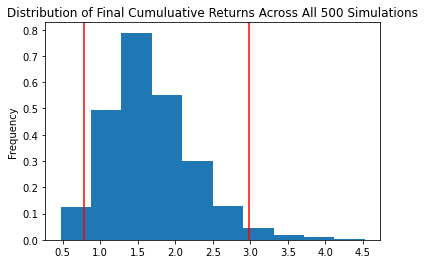

In [36]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()
# Save the plot for future usage
dist_plot.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [37]:
tbl = MC_30year.summarize_cumulative_return()
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.673664
std               0.583775
min               0.469065
25%               1.280686
50%               1.589323
75%               1.991418
max               4.527499
95% CI Lower      0.782959
95% CI Upper      2.979797
Name: 1260, dtype: float64


In [38]:
# Set initial investment
initial_investment_60k_five = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment_60k_five,2)
ci_upper_five = round(tbl[9]*initial_investment_60k_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $137319.84 and $763934.24


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(portfolio_data = df_ticker,weights = [.20,.80],num_simulation = 500,num_trading_days = 252*10)

In [40]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005731,1.007158,1.005252,1.021002,1.016533,0.992862,1.001443,1.001772,1.016902,1.014631,...,0.995765,0.994812,1.007625,0.998574,1.004186,1.009169,1.002151,1.002381,1.004343,0.978907
2,0.978431,1.001113,1.009319,1.045197,1.003284,0.994670,1.009356,0.999496,1.002877,1.000795,...,0.988224,0.997235,1.011690,0.982679,1.009640,0.983707,0.989526,0.995924,0.996128,0.986767
3,0.987129,0.993193,1.029442,1.053650,1.007216,0.988228,1.008704,1.022397,1.003616,0.998920,...,0.997490,1.000433,1.014426,0.992929,1.007054,0.983831,0.995682,0.996790,0.993078,0.984652
4,0.997977,0.983080,1.040936,1.048349,1.019770,0.997194,1.005941,1.012174,1.004759,0.978158,...,0.984280,1.019038,1.028627,0.987453,1.012924,0.980905,0.982473,0.995869,1.003165,0.979565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.057738,2.113357,1.823730,2.354999,2.048100,4.089258,1.618725,4.877600,1.402147,3.209080,...,1.834580,2.284621,1.669592,2.024511,2.902983,0.994299,1.612760,2.034758,2.233837,4.756501
2517,1.068255,2.102395,1.809717,2.335427,2.073408,4.138185,1.624000,4.896004,1.406066,3.211461,...,1.827074,2.313775,1.657688,2.047882,2.939762,0.984814,1.627743,2.066189,2.224544,4.835722
2518,1.066134,2.114043,1.817120,2.355793,2.095148,4.168132,1.612595,4.877181,1.405247,3.211160,...,1.825524,2.338820,1.673931,2.058818,2.944186,0.978807,1.618346,2.067416,2.218116,4.877773
2519,1.072736,2.119883,1.822666,2.317993,2.100306,4.189939,1.598150,4.830994,1.391514,3.211864,...,1.828552,2.330621,1.649041,2.071621,2.937149,0.968951,1.618509,2.093686,2.222585,4.828101


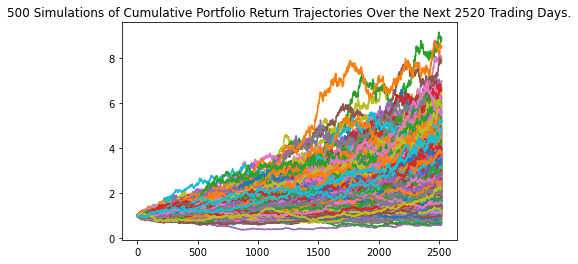

In [41]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

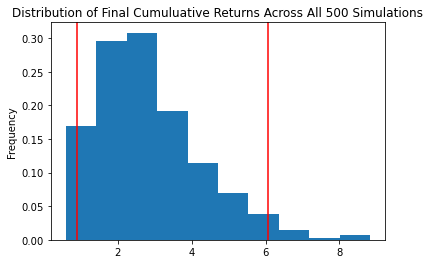

In [42]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [43]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.845655
std               1.413844
min               0.590718
25%               1.798887
50%               2.519312
75%               3.621692
max               8.833606
95% CI Lower      0.895752
95% CI Upper      6.076415
Name: 2520, dtype: float64


In [44]:
tbl = MC_30year.summarize_cumulative_return()
# Set initial investment
initial_investment_60k_ten = 60000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment_60k_ten,2)
ci_upper_ten = round(tbl[9]*initial_investment_60k_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $137319.84 and $763934.24
